In [0]:
import osgeo.ogr

In [0]:
shapefile=osgeo.ogr.Open("D:/TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp")

In [0]:
layer=shapefile.GetLayer(0)

In [0]:
layer

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x0277EE90> >

In [0]:
layer.GetFeatureCount()

246

In [0]:
for i in range(layer.GetFeatureCount()):
    feature=layer.GetFeature(i)

In [0]:
feature

<osgeo.ogr.Feature; proxy of <Swig Object of type 'OGRFeatureShadow *' at 0x03CA5B60> >

In [0]:
feature_name=feature.GetField("NAME")
feature_name

'Taiwan'

In [0]:
geometry=feature.GetGeometryRef()
geometry

<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x03CA5BD8> >

In [0]:
geometry_type=geometry.GetGeometryName()

In [0]:
geometry_type

'MULTIPOLYGON'

In [0]:
print(i , feature_name,geometry_type)

(245, 'Taiwan', 'MULTIPOLYGON')


In [0]:
import osgeo.ogr
shapefile = osgeo.ogr.Open("D:/TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp")
layer = shapefile.GetLayer(0)
for i in range(layer.GetFeatureCount()):
    feature = layer.GetFeature(i)
    feature_name = feature.GetField("NAME")
    geometry = feature.GetGeometryRef()
    geometry_type = geometry.GetGeometryName()
    print i, feature_name, geometry_type

0 Antigua and Barbuda MULTIPOLYGON
1 Algeria POLYGON
2 Azerbaijan MULTIPOLYGON
3 Albania POLYGON
4 Armenia MULTIPOLYGON
5 Angola MULTIPOLYGON
6 American Samoa MULTIPOLYGON
7 Argentina MULTIPOLYGON
8 Australia MULTIPOLYGON
9 Bahrain MULTIPOLYGON
10 Barbados POLYGON
11 Bermuda MULTIPOLYGON
12 Bahamas MULTIPOLYGON
13 Bangladesh MULTIPOLYGON
14 Belize MULTIPOLYGON
15 Bosnia and Herzegovina POLYGON
16 Bolivia POLYGON
17 Burma MULTIPOLYGON
18 Benin POLYGON
19 Solomon Islands MULTIPOLYGON
20 Brazil MULTIPOLYGON
21 Bulgaria POLYGON
22 Brunei Darussalam MULTIPOLYGON
23 Canada MULTIPOLYGON
24 Cambodia MULTIPOLYGON
25 Sri Lanka MULTIPOLYGON
26 Congo POLYGON
27 Democratic Republic of the Congo MULTIPOLYGON
28 Burundi POLYGON
29 China MULTIPOLYGON
30 Afghanistan POLYGON
31 Bhutan POLYGON
32 Chile MULTIPOLYGON
33 Cayman Islands MULTIPOLYGON
34 Cameroon MULTIPOLYGON
35 Chad POLYGON
36 Comoros MULTIPOLYGON
37 Colombia MULTIPOLYGON
38 Costa Rica MULTIPOLYGON
39 Central African Republic POLYGON
40 Cuba 

In [0]:
import shapely.wkt

In [0]:
feature=layer.GetFeature(0)

In [0]:
geometry=feature.GetGeometryRef()

In [0]:
wkt=geometry.ExportToWkt()

In [0]:
outline=shapely.wkt.loads(wkt)

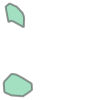

In [0]:
outline

In [0]:
print(outline.centroid.x,outline.centroid.y)

(-61.79112751703739, 17.28013658681315)


In [0]:
outline.bounds

(-61.891113, 16.989719, -61.666389, 17.724998)

In [0]:
import osgeo.ogr
import shapely.wkt

def main():
    shapefile=osgeo.ogr.Open("D:/TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp")
    layer=shapefile.GetLayer(0)
    countries={}
    for i in range(layer.GetFeatureCount()):
        feature=layer.GetFeature(i)
        country=feature.GetField("NAME")
        outline=shapely.wkt.loads(feature.GetGeometryRef().ExportToWkt())
        countries[country]=outline
        #print "Loaded %d countries" % len(countries)
        for country in sorted(countries.keys()):
            outline = countries[country]
        for other_country in sorted(countries.keys()):
            if country == other_country: continue
        other_outline = countries[other_country]
        if outline.touches(other_outline):
            print "%s borders %s" % (country, other_country)

In [0]:
import pysal

In [0]:
f = pysal.open(pysal.examples.get_path("stl_hom.txt"))

In [0]:
f

DataTable: C:\Anaconda2\envs\ocean\lib\site-packages\pysal\examples\stl\stl_hom.txt

In [0]:
import numpy as np
y = np.array(f.by_col['HR8893'])
y

array([  1.624458,   2.255492,   1.46789 ,   2.484256,   0.      ,
         9.048673,   6.029489,   1.800385,   4.581251,   3.790607,
         1.447436,   1.191966,   0.      ,   1.608017,   1.949812,
         0.74509 ,   4.173318,   3.783252,   2.085136,   2.176302,
         6.309347,  10.855743,   4.211354,   0.80481 ,   3.215331,
         2.833664,   1.59204 ,   1.571158,   3.12759 ,   4.416896,
         3.017486,   9.924245,   7.973957,   5.005464,   2.463891,
         0.      ,   7.377974,   1.003875,   3.190047,  45.905406,
         2.447597,   1.294958,   5.933098,   4.133997,   4.298311,
        27.483827,   0.969791,   0.      ,   2.934466,   4.456427,
         4.629264,   4.941533,   3.990041,   2.064324,   3.040253,
         3.905411,   4.332839,   3.894111,   6.828794,   3.263947,
         3.282163,   3.295762,   7.249679,   3.041846,   1.618018,
         4.910801,   1.991457,   3.146192,   7.26665 ,   3.110904,
         2.980271,   3.866767,   1.868408,  12.577034,   7.803

In [0]:
w = pysal.open(pysal.examples.get_path("stl.gal")).read()
w

In [0]:
 mi = pysal.Moran(y, w, two_tailed=False)
print('Observed I:', mi.I, '\nExpected I:', mi.EI, '\n   p-value:', mi.p_norm)


('Observed I:', 0.24365582621771695, '\nExpected I:', -0.012987012987012988, '\n   p-value:', 0.00013573931385468807)


In [0]:
help(mi)

Help on Moran in module pysal.esda.moran object:

class Moran(__builtin__.object)
 |  Moran's I Global Autocorrelation Statistic
 |  
 |  Parameters
 |  ----------
 |  
 |  y               : array
 |                    variable measured across n spatial units
 |  w               : W
 |                    spatial weights instance
 |  transformation  : string
 |                    weights transformation,  default is row-standardized "r".
 |                    Other options include "B": binary,  "D":
 |                    doubly-standardized,  "U": untransformed
 |                    (general weights), "V": variance-stabilizing.
 |  permutations    : int
 |                    number of random permutations for calculation of
 |                    pseudo-p_values
 |  two_tailed      : boolean
 |                    If True (default) analytical p-values for Moran are two
 |                    tailed, otherwise if False, they are one-tailed.
 |  
 |  Attributes
 |  ----------
 |  y            

In [0]:
import pysal as ps
import pandas as pd

In [0]:
f=ps.open("E:/gds_scipy16/content/data/texas.shp")

In [0]:
f.header

{'BBOX Mmax': 0.0,
 'BBOX Mmin': 0.0,
 'BBOX Xmax': -93.50721740722656,
 'BBOX Xmin': -106.6495132446289,
 'BBOX Ymax': 36.49387741088867,
 'BBOX Ymin': 25.845197677612305,
 'BBOX Zmax': 0.0,
 'BBOX Zmin': 0.0,
 'File Code': 9994,
 'File Length': 49902,
 'Shape Type': 5,
 'Unused0': 0,
 'Unused1': 0,
 'Unused2': 0,
 'Unused3': 0,
 'Unused4': 0,
 'Version': 1000}

In [0]:
from pysal.spreg import ols
from pysal.spreg import ml_error
from pysal.spreg import ml_lag

In [0]:
f = pysal.open(pysal.examples.get_path("columbus.dbf"),'r')
y = np.array(f.by_col['HOVAL'])
y.shape = (len(y),1)
X= []
X.append(f.by_col['INC'])
X.append(f.by_col['CRIME'])
X = np.array(X).T


In [0]:
'''depend y for home value
x = income and crime independend
'''
ls = ols.OLS(y, X, name_y = 'home val', name_x = ['Income', 'Crime'], name_ds = 'Columbus')
print(ls.summary)


REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :    Columbus
Weights matrix      :        None
Dependent Variable  :    home val                Number of Observations:          49
Mean dependent var  :     38.4362                Number of Variables   :           3
S.D. dependent var  :     18.4661                Degrees of Freedom    :          46
R-squared           :      0.3495
Adjusted R-squared  :      0.3212
Sum squared residual:   10647.015                F-statistic           :     12.3582
Sigma-square        :     231.457                Prob(F-statistic)     :   5.064e-05
S.E. of regression  :      15.214                Log likelihood        :    -201.368
Sigma-square ML     :     217.286                Akaike info criterion :     408.735
S.E of regression ML:     14.7406                Schwarz criterion     :     414.411

-----------------------------------------------------------------------------

In [0]:
w = pysal.open(pysal.examples.get_path("columbus.gal")).read()


In [0]:
mi = pysal.Moran(ls.u, w, two_tailed=False)
print('Observed I:', mi.I, '\nExpected I:', mi.EI, '\n   p-value:', mi.p_norm)


('Observed I:', 0.17131015816921427, '\nExpected I:', -0.020833333333333332, '\n   p-value:', 0.01893042752120222)


In [0]:
spat_err = ml_error.ML_Error(y, X, w, 
                             name_y='home value', name_x=['income','crime'], 
                             name_w='columbus.gal', name_ds='columbus')
print(spat_err.summary)


C:\Anaconda2\envs\ocean\lib\site-packages\scipy\optimize\_minimize.py:643: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :    columbus
Weights matrix      :columbus.gal
Dependent Variable  :  home value                Number of Observations:          49
Mean dependent var  :     38.4362                Number of Variables   :           3
S.D. dependent var  :     18.4661                Degrees of Freedom    :          46
Pseudo R-squared    :      0.3495
Sigma-square ML     :     197.314                Log likelihood        :    -199.769
S.E of regression   :      14.047                Akaike info criterion :     405.537
                                                 Schwarz criterion     :     411.213

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import colors
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [0]:
filename = 'Shasta-30m-DEM.tif'

# instantiate a processor object
processor = DEMProcessor(filename)

# get magnitude of slope and aspect
mag, aspect = processor.calc_slopes_directions()

In [0]:
import rasterio

In [0]:
from shapely.geometry import Polygon

In [0]:
p1=Polygon(((11,12),(100,100),(200,90),(40,9),(60),(11,12)))

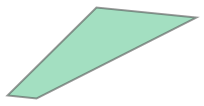

In [0]:
p1

In [0]:
p2 = Polygon(((6,6), (7,6), (10,4), (11,8), (6,6)))

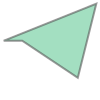

In [0]:
p2

In [0]:
from shapely.geometry import Point

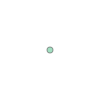

In [0]:
point=Point(2,2)
point

In [0]:
from shapely.geometry import LineString

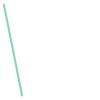

In [0]:
line=LineString([(12,0),(10,10)])
line

In [0]:
from shapely.geometry.polygon import LinearRing

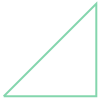

In [0]:
ring=LinearRing([(0,0),(3,3),(3,0)])
ring

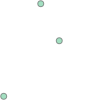

In [0]:
from shapely.geometry import MultiPoint
points = MultiPoint([(0.0, 0.0), (2,5),(3.0, 3.0)])
points

In [0]:
from shapely.geometry import MultiLineString
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
coords

[((0, 0), (1, 1)), ((-1, 0), (1, 0))]

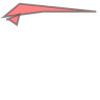

In [0]:
from shapely.geometry import MultiPolygon
polygons = MultiPolygon([p1, p2,])
polygons

In [0]:
p1.area

2.0

In [0]:
p1.bounds

(1.0, 2.0, 7.0, 9.0)

In [0]:
p1.length

18.858736672225525

In [0]:
p1.geom_type

'Polygon'

In [0]:
import fiona

In [0]:
shp=fiona.open("F:/qgis data/Natural_Earth_quick_start/packages/Natural_Earth_quick_start/110m_cultural/ne_110m_admin_1_states_provinces_shp.shp")

In [0]:
shp

<open Collection 'F:/qgis data/Natural_Earth_quick_start/packages/Natural_Earth_quick_start/110m_cultural/ne_110m_admin_1_states_provinces_shp.shp:ne_110m_admin_1_states_provinces_shp', mode 'r' at 0x411c650>

In [0]:
rec=next(iter(shp))
rec

{'geometry': {'coordinates': [[(-89.59940914585667, 48.01027395282483),
    (-89.48888455722101, 48.01343887860651),
    (-89.52269548211933, 47.96053538674391),
    (-89.61369767938538, 47.81925202085796),
    (-89.72800594761503, 47.641976019880644),
    (-89.84283098016755, 47.464725857119504),
    (-89.95765601272012, 47.28690725360326),
    (-90.13175391311142, 47.29274669045219),
    (-90.30585181350267, 47.29801768654602),
    (-90.47994971389409, 47.30385712339489),
    (-90.65404761428533, 47.30912811948872),
    (-90.85778194859608, 47.21282908791278),
    (-91.06097368036774, 47.11704682065988),
    (-91.26470801467849, 47.02126455340681),
    (-91.46844234898913, 46.92496552183104),
    (-91.59225908076053, 46.876260484395914),
    (-91.71661841507085, 46.827607123393136),
    (-91.8409777493813, 46.778385321635085),
    (-91.96479448115258, 46.72970612241613),
    (-92.01189754918664, 46.71172272397854),
    (-92.27487891311995, 46.65614472104869),
    (-92.26482784703921,

In [0]:
rec.keys()

['geometry', 'type', 'id', 'properties']

In [0]:
import  pprint

In [0]:
pprint.pprint(rec['type'])

'Feature'


In [0]:
print(pprint.pprint(rec['properties']))

OrderedDict([(u'scalerank', 2L), (u'featurecla', u'Admin-1 scale rank'), (u'adm1_code', u'USA-3514'), (u'diss_me', 3514L), (u'adm1_cod_1', u'USA-3514'), (u'iso_3166_2', u'US-MN'), (u'wikipedia', u'http://en.wikipedia.org/wiki/Minnesota'), (u'sr_sov_a3', u'US1'), (u'sr_adm0_a3', u'USA'), (u'iso_a2', u'US'), (u'adm0_sr', 1L), (u'admin0_lab', 2L), (u'name', u'Minnesota'), (u'name_alt', u'MN|Minn.'), (u'name_local', None), (u'type', u'State'), (u'type_en', u'State'), (u'code_local', u'US32'), (u'code_hasc', u'US.MN'), (u'note', None), (u'hasc_maybe', None), (u'region', u'Midwest'), (u'region_cod', None), (u'region_big', u'West North Central'), (u'big_code', None), (u'provnum_ne', 0L), (u'gadm_level', 1L), (u'check_me', 10L), (u'scaleran_1', 2L), (u'datarank', 1L), (u'abbrev', u'Minn.'), (u'postal', u'MN'), (u'area_sqkm', 0.0), (u'sameascity', -99L), (u'labelrank', 0L), (u'featurec_1', u'Admin-1 scale rank'), (u'admin', u'United States of America'), (u'name_len', 9L), (u'mapcolor9', 1L), (u

In [0]:
shp.driver

u'ESRI Shapefile'

In [0]:
print(shp.crs)

print(shp.schema)

{'init': u'epsg:4326'}
{'geometry': 'Polygon', 'properties': OrderedDict([(u'scalerank', 'int:10'), (u'featurecla', 'str:32'), (u'adm1_code', 'str:10'), (u'diss_me', 'int:9'), (u'adm1_cod_1', 'str:10'), (u'iso_3166_2', 'str:10'), (u'wikipedia', 'str:254'), (u'sr_sov_a3', 'str:3'), (u'sr_adm0_a3', 'str:3'), (u'iso_a2', 'str:2'), (u'adm0_sr', 'int:4'), (u'admin0_lab', 'int:4'), (u'name', 'str:100'), (u'name_alt', 'str:200'), (u'name_local', 'str:200'), (u'type', 'str:100'), (u'type_en', 'str:100'), (u'code_local', 'str:50'), (u'code_hasc', 'str:10'), (u'note', 'str:254'), (u'hasc_maybe', 'str:50'), (u'region', 'str:100'), (u'region_cod', 'str:50'), (u'region_big', 'str:200'), (u'big_code', 'str:50'), (u'provnum_ne', 'int:9'), (u'gadm_level', 'int:4'), (u'check_me', 'int:4'), (u'scaleran_1', 'int:4'), (u'datarank', 'int:4'), (u'abbrev', 'str:10'), (u'postal', 'str:10'), (u'area_sqkm', 'float:13.11'), (u'sameascity', 'int:4'), (u'labelrank', 'int:4'), (u'featurec_1', 'str:50'), (u'admin', 

In [0]:
from shapely.geometry import shape
minnesota={'type':'Polygon','coordinates':[[(-89.61369767938538, 47.81925202085796), (-89.72800594761503,
47.641976019880644), (-89.84283098016755, 47.464725857119504),
(-89.95765601272012, 47.286907253603175),]]}

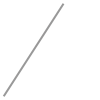

In [0]:
geom=shape(minnesota)
geom

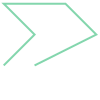

In [0]:

line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
shape(line)

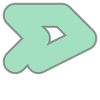

In [0]:
dilated=line.buffer(0.5)
shape(dilated)


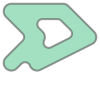

In [0]:
eroded=dilated.buffer(-0.2)
eroded

In [0]:
shp

<open Collection 'F:/qgis data/Natural_Earth_quick_start/packages/Natural_Earth_quick_start/110m_cultural/ne_110m_admin_1_states_provinces_shp.shp:ne_110m_admin_1_states_provinces_shp', mode 'r' at 0xab69ad0>

In [0]:
type(shp)

fiona.collection.Collection